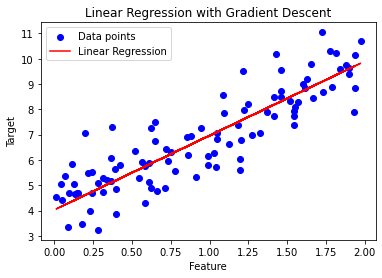

array([[4.03321421],
       [2.93070525]])

In [30]:
import numpy as np
import matplotlib.pyplot as plt

def predict(X, theta):
    return np.dot(X, theta)

def cost_function(X, y, theta):
    m = len(y)
    predictions = predict(X, theta) # (n*1) = (n*m) (m*1)
    squared_errors = (predictions - y) ** 2 #(n*1)
    cost = (1/(2*m)) * np.sum(squared_errors) # 1
    return cost

def gradient_descent(X, y, theta, learning_rate, num_iterations):
    m = len(y)
    costs = []

    for _ in range(num_iterations):
        predictions = predict(X, theta) # (n*1) = (n*m) (m*1)
        errors = predictions - y #(n*1)
        gradient = (1/m) * np.dot(X.T, errors) # (m*1) =(m*n) * (n*1)
        theta -= learning_rate * gradient # (m*1)

        cost = cost_function(X, y, theta) # 1
        costs.append(cost)

    return theta, costs

# Generate synthetic data for demonstration
np.random.seed(42)
m = 100  # Number of data points
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)

# Add bias term to X
X_b = np.c_[np.ones((m, 1)), X]

# Initialize parameters
theta = np.zeros((2, 1))  # Additional feature for bias term

# Set hyperparameters
learning_rate = 0.01
num_iterations = 1000

# Train the linear regression model using gradient descent
theta, costs = gradient_descent(X_b, y, theta, learning_rate, num_iterations)

# Make predictions
predictions = predict(X_b, theta)

# Plot the data points and regression line
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, predictions, color='red', label='Linear Regression')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Linear Regression with Gradient Descent')
plt.legend()
plt.show()

theta

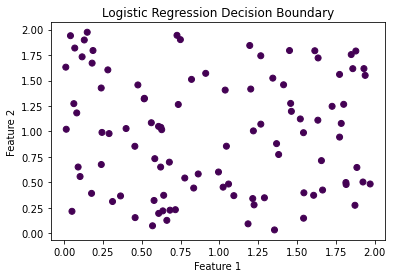

array([[ 0.33066948],
       [ 1.34194243],
       [-0.12440961]])

In [31]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost_function(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    cost = -(1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

def gradient_descent(X, y, theta, learning_rate, num_iterations):
    m = len(y)
    costs = []

    for _ in range(num_iterations):
        h = sigmoid(np.dot(X, theta))
        gradient = np.dot(X.T, (h - y)) / m
        theta -= learning_rate * gradient

        cost = cost_function(X, y, theta)
        costs.append(cost)

    return theta, costs

def predict(X, theta):
    return np.round(sigmoid(np.dot(X, theta)))


# Generate synthetic data for demonstration
np.random.seed(42)
m = 100  # Number of data points
n = 2    # Number of features

X = 2 * np.random.rand(m, n)
y = (4 + 3 * X[:, 0:1] + np.random.randn(m, 1) > 5).astype(int)

# Add bias term to X
X_b = np.c_[np.ones((m, 1)), X]

# Initialize parameters
theta = np.zeros((n + 1, 1))  # Additional feature for bias term

# Set hyperparameters
learning_rate = 0.01
num_iterations = 1000

# Train the logistic regression model using gradient descent
theta, costs = gradient_descent(X_b, y, theta, learning_rate, num_iterations)

# Make predictions
predictions = predict(X_b, theta)

# Plot the decision boundary and data points
plt.scatter(X[:, 0], X[:, 1], c=predictions.flatten(), cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.show()

theta

In [18]:
# X_b.shape

Epoch 0, Cost: 0.8163
Epoch 100, Cost: 0.4804
Epoch 200, Cost: 0.3068
Epoch 300, Cost: 0.2308
Epoch 400, Cost: 0.1909
Epoch 500, Cost: 0.1662
Epoch 600, Cost: 0.1490
Epoch 700, Cost: 0.1363
Epoch 800, Cost: 0.1264
Epoch 900, Cost: 0.1185


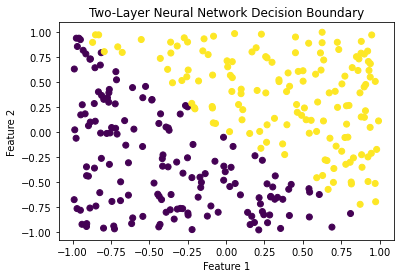

In [32]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def initialize_parameters(input_size, hidden_size, output_size):
    np.random.seed(42)
    W1 = np.random.randn(input_size, hidden_size)
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, output_size)
    b2 = np.zeros((1, output_size))
    return W1, b1, W2, b2

def forward_propagation(X, W1, b1, W2, b2):
    layer1_output = sigmoid(np.dot(X, W1) + b1)
    layer2_output = sigmoid(np.dot(layer1_output, W2) + b2)
    return layer1_output, layer2_output

def compute_cost(y, predictions):
    m = len(y)
    cost = -(1/m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    return cost

def backward_propagation(X, y, layer1_output, layer2_output, W2):
    m = len(y)
    error2 = layer2_output - y
    delta2 = error2 * sigmoid_derivative(layer2_output)
    
    error1 = delta2.dot(W2.T)
    delta1 = error1 * sigmoid_derivative(layer1_output)
    
    return delta1, delta2

def update_parameters(W1, b1, W2, b2, X, layer1_output, delta1, delta2, learning_rate):
    m = len(X)
    W2 -= learning_rate * layer1_output.T.dot(delta2) / m
    b2 -= learning_rate * np.sum(delta2, axis=0, keepdims=True) / m
    W1 -= learning_rate * X.T.dot(delta1) / m
    b1 -= learning_rate * np.sum(delta1, axis=0, keepdims=True) / m
    return W1, b1, W2, b2

def train_neural_network(X, y, input_size, hidden_size, output_size, learning_rate, num_epochs):
    W1, b1, W2, b2 = initialize_parameters(input_size, hidden_size, output_size)
    costs = []

    for epoch in range(num_epochs):
        layer1_output, layer2_output = forward_propagation(X, W1, b1, W2, b2)
        cost = compute_cost(y, layer2_output)
        delta1, delta2 = backward_propagation(X, y, layer1_output, layer2_output, W2)
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, X, layer1_output, delta1, delta2, learning_rate)

        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Cost: {cost:.4f}")

        costs.append(cost)

    return W1, b1, W2, b2, costs

def predict(X, W1, b1, W2, b2):
    _, predictions = forward_propagation(X, W1, b1, W2, b2)
    return np.round(predictions)

# Generate synthetic data for demonstration
np.random.seed(42)
m = 300
X = np.random.rand(m, 2) * 2 - 1  # Random values between -1 and 1
y = ((X[:, 0] + X[:, 1]) > 0).astype(int).reshape(-1, 1)

# Set hyperparameters
input_size = X.shape[1]
hidden_size = 4
output_size = 1
learning_rate = 1
num_epochs = 1000

# Train the neural network
W1, b1, W2, b2, costs = train_neural_network(X, y, input_size, hidden_size, output_size, learning_rate, num_epochs)

# Make predictions
predictions = predict(X, W1, b1, W2, b2)

# Plot decision boundary and data points
plt.scatter(X[:, 0], X[:, 1], c=predictions.flatten(), cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Two-Layer Neural Network Decision Boundary')
plt.show()


Text(0, 0.5, 'Featur')

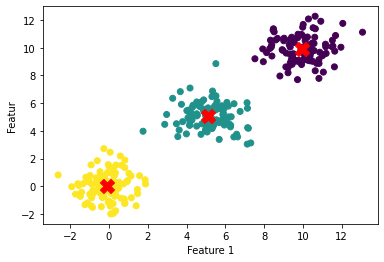

In [34]:
import numpy as np
import matplotlib.pyplot as plt

def initialize_centroids(X, k):
    np.random.seed(42)
    indices = np.random.choice(X.shape[0], k, replace=False)
    centroids = X[indices, :]
    return centroids

def assign_to_clusters(X, centroids):
    distances = np.linalg.norm(X[:, np.newaxis, :] - centroids, axis=2)
    labels = np.argmin(distances, axis=1)
    return labels

def update_centroids(X, labels, k):
    centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
    return centroids

def k_means(X, k, num_iterations):
    centroids = initialize_centroids(X, k)
    for _ in range(num_iterations):
        labels = assign_to_clusters(X, centroids)
        centroids = update_centroids(X, labels, k)
    return labels, centroids

# Generate synthetic data for demonstration
np.random.seed(42)
m = 300
X = np.concatenate([np.random.normal(loc=0, scale=1, size=(m//3, 2)),
                    np.random.normal(loc=5, scale=1, size=(m//3, 2)),
                    np.random.normal(loc=10, scale=1, size=(m//3, 2))])

# Set hyperparameters
k = 3
num_iterations = 100

# Apply k-means clustering
labels, centroids = k_means(X, k, num_iterations)

# Plot the clusters and centroids
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Featur')
